In [ ]:
import numpy as np
import pandas as pd
import re as re
import seaborn as sns 
import matplotlib.pyplot as plt

from app.settings.constants import TRAIN_CSV, VAL_CSV 

df = pd.read_csv(TRAIN_CSV, header=0)

df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.237661e+18,131.780006,31.176427,19.36940,18.12787,17.52943,17.19604,16.95938,3606,301,4,55,1.428936e+18,0.083662,1269,52937,613,GALAXY
1,1.237661e+18,156.737605,45.040668,21.55932,20.79034,20.13112,19.76833,19.55089,3530,301,6,256,8.318262e+18,1.514154,7388,56783,414,QSO
2,1.237668e+18,219.297509,14.916453,22.15941,21.44747,20.71200,19.84396,20.05038,5322,301,4,64,6.159933e+18,0.810434,5471,56034,489,GALAXY
3,1.237663e+18,239.961448,26.161812,20.95769,19.39191,18.67904,18.35519,18.12411,4002,301,4,208,2.785483e+18,-0.000261,2474,54564,24,STAR
4,1.237655e+18,251.462479,39.158686,20.64332,19.69718,19.41441,19.37871,19.34221,2328,301,6,66,5.847047e+18,-0.000848,5193,56066,904,STAR


In [3]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID', 'class'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df['class']

0        0
1        1
2        0
3        2
4        2
        ..
18895    0
18896    2
18897    1
18898    1
18899    0
Name: class, Length: 18900, dtype: int32

In [5]:
Xcols = ['u', 'g', 'r', 'i', 'z', 'redshift', 'plate']

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[Xcols] = ss.fit_transform(df[Xcols])

In [7]:
df[Xcols].head()

,u,g,r,i,z,redshift,plate
0,-1.110967,-1.211060,-1.197777,-1.169118,-1.140942,-0.688661,-1.370734
1,-0.100615,0.153058,0.222283,0.276280,0.295094,0.888318,0.666822
2,0.176246,0.489738,0.539340,0.318777,0.571877,0.112535,0.028483
3,-0.378186,-0.563428,-0.570295,-0.517779,-0.495529,-0.781177,-0.969483
4,-0.523225,-0.407023,-0.168913,0.057348,0.179458,-0.781824,-0.064087


In [8]:
fs_df = df[Xcols + ['class']]

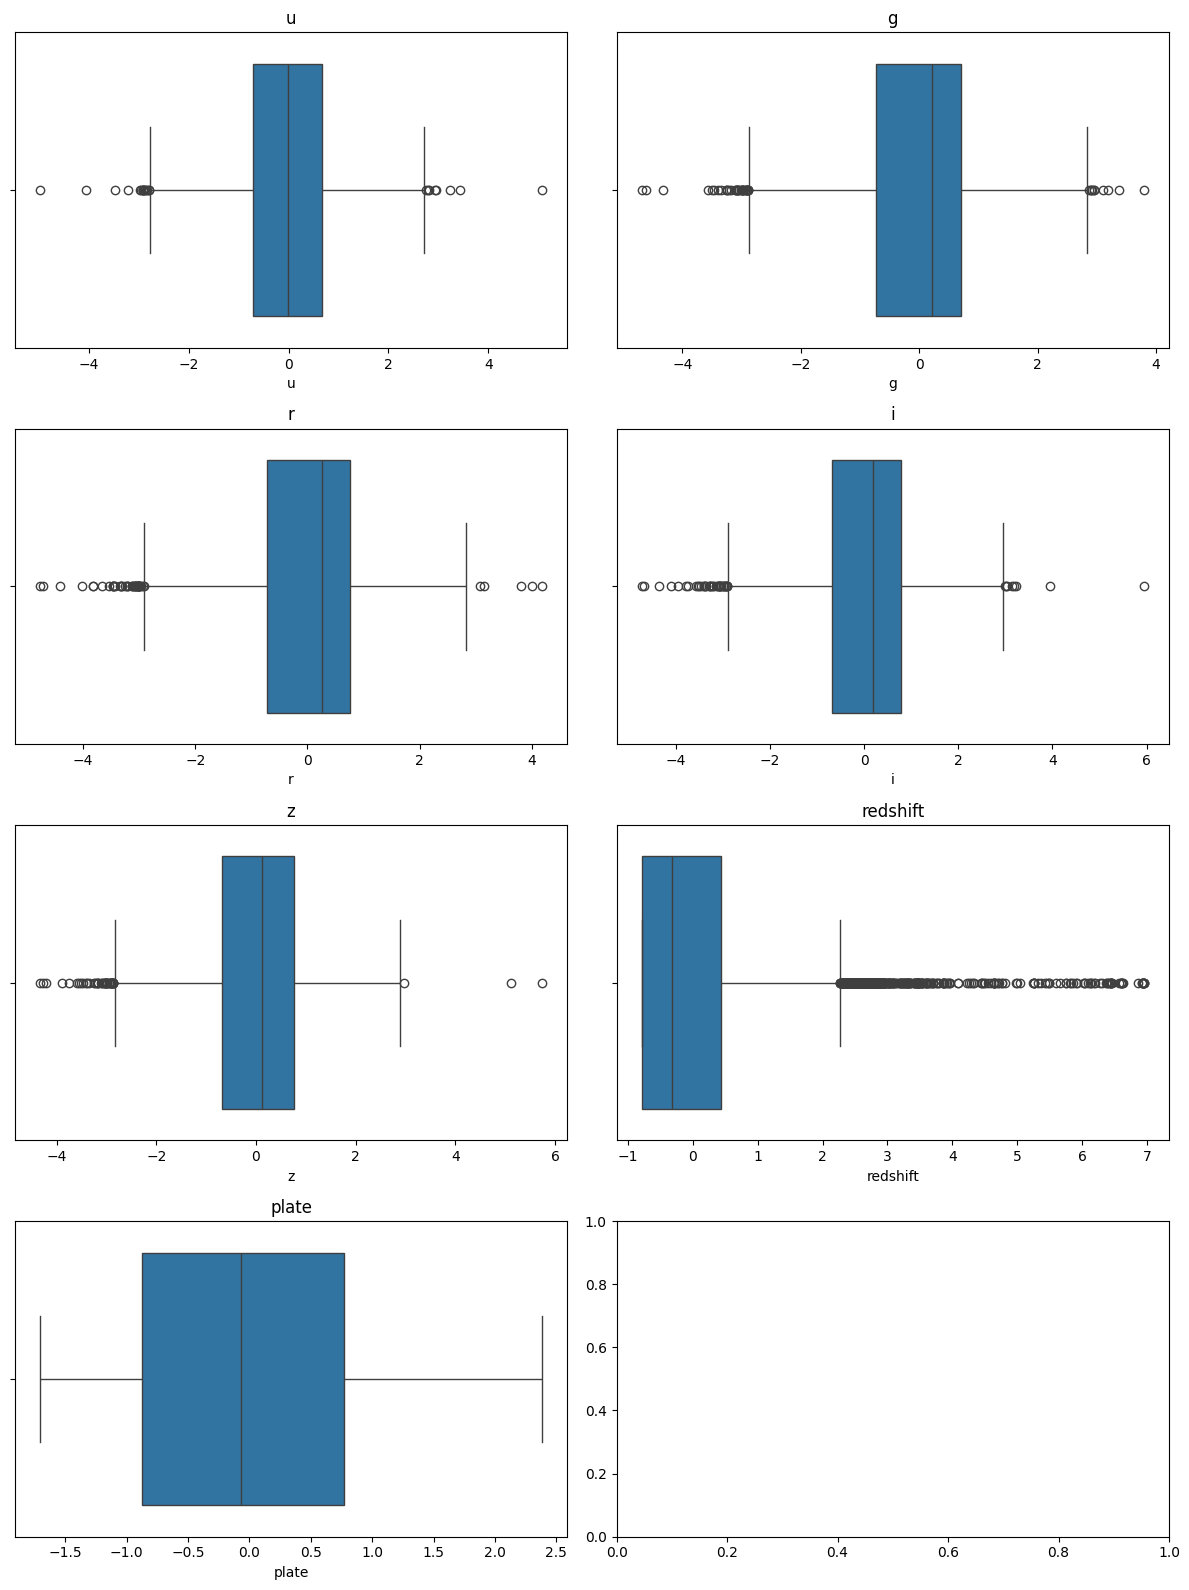

In [9]:
n = len(Xcols)
cols = 2
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

axes = axes.flatten()

for i, col in enumerate(Xcols):
    sns.boxplot(data=fs_df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")

plt.tight_layout()
plt.show()

In [23]:
clipped_df = fs_df.copy()

outliar_cols = ['u', 'g', 'r', 'i', 'z']
for column in outliar_cols:
    Q1 = clipped_df[column].quantile(0.25)
    Q3 = clipped_df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 2 * IQR
    upper_limit = Q3 + 2 * IQR

    clipped_df.loc[clipped_df[column] < lower_limit, column] = lower_limit
    clipped_df.loc[clipped_df[column] > upper_limit, column] = upper_limit

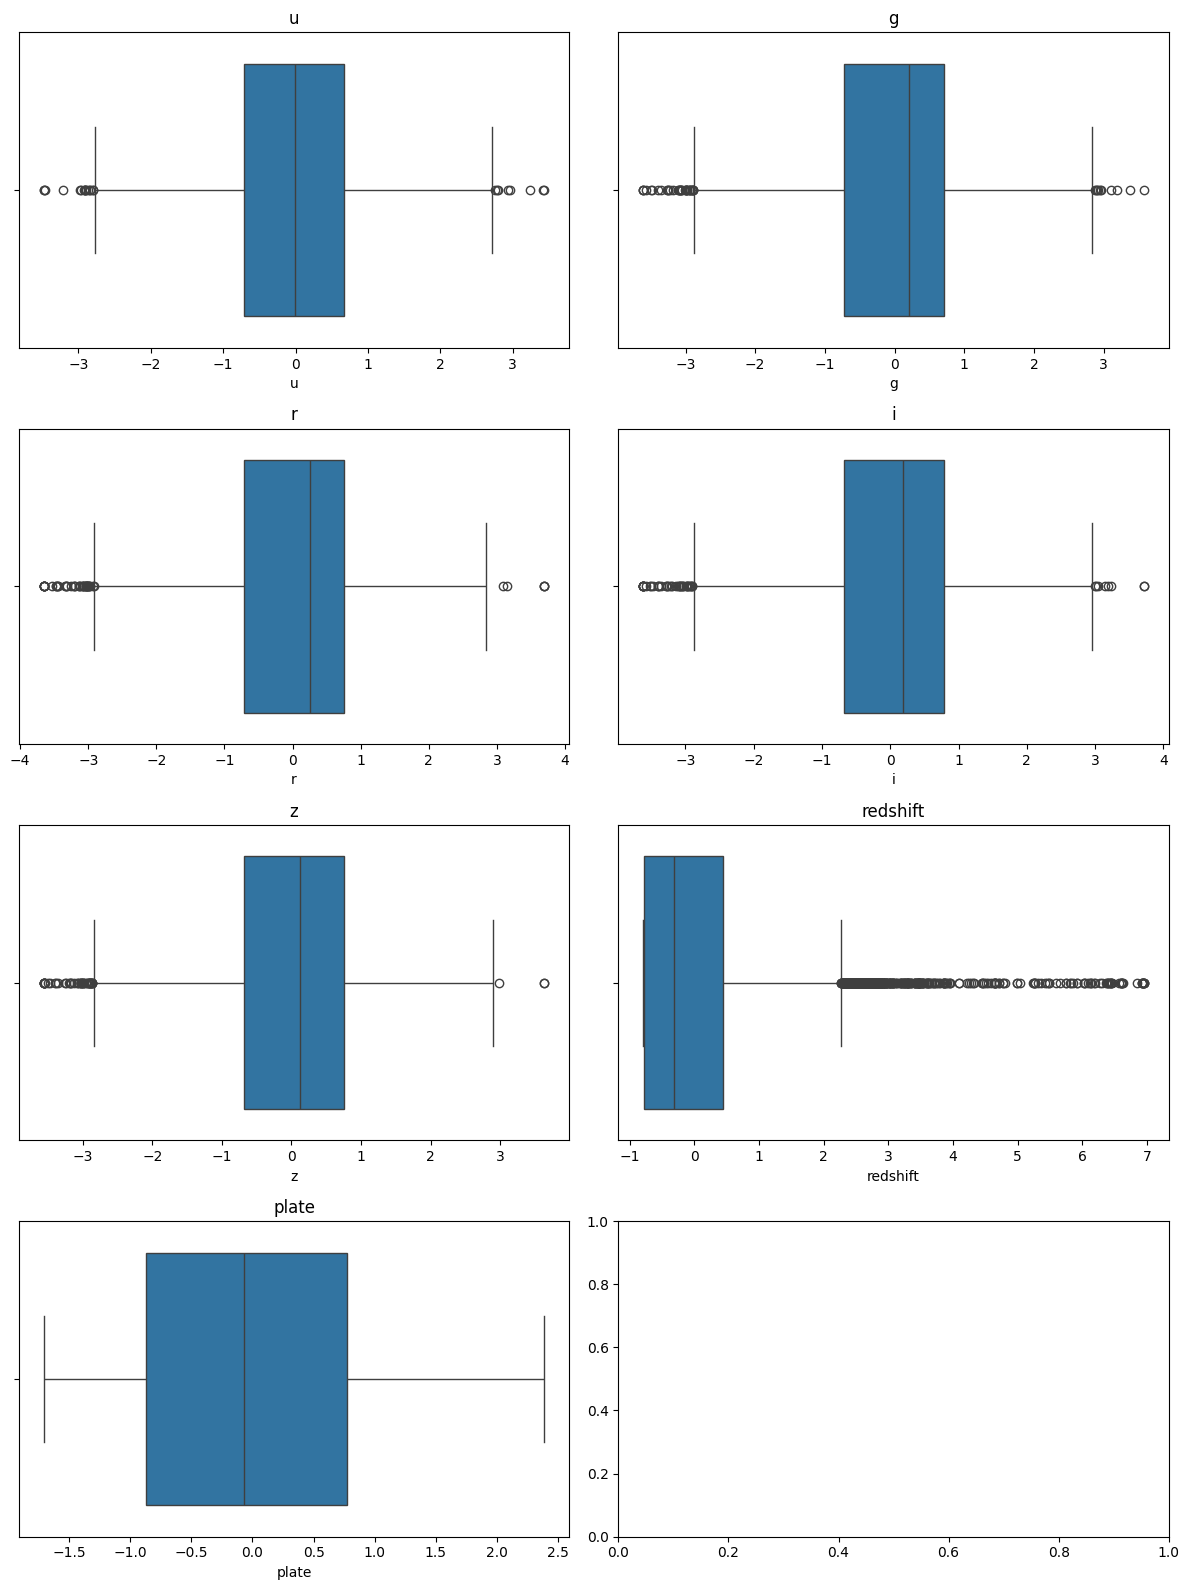

In [24]:
n = len(Xcols)
cols = 2
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

axes = axes.flatten()

for i, col in enumerate(Xcols):
    sns.boxplot(data=clipped_df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")

plt.tight_layout()
plt.show()

<Axes: xlabel='redshift', ylabel='Count'>

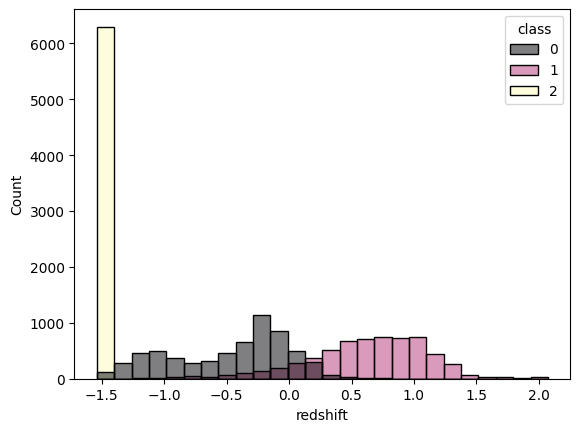

In [26]:
clipped_df['redshift'] = np.log1p(fs_df['redshift'])
sns.histplot(data=clipped_df, x='redshift', hue='class', palette='magma')

<Axes: xlabel='redshift'>

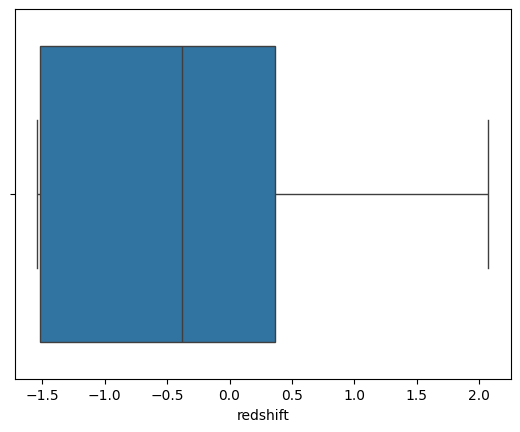

In [27]:
sns.boxplot(data=clipped_df, x='redshift')